In [1]:
import pysam
import collections

import matplotlib.pyplot as plt

In [2]:
!wget http://krishna.gs.washington.edu/content/members/mouse_ATAC_atlas_website/bams/Cerebellum_62216.bam

--2021-02-21 14:50:36--  http://krishna.gs.washington.edu/content/members/mouse_ATAC_atlas_website/bams/Cerebellum_62216.bam
Resolving krishna.gs.washington.edu (krishna.gs.washington.edu)... 128.208.8.159
Connecting to krishna.gs.washington.edu (krishna.gs.washington.edu)|128.208.8.159|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2214055229 (2.1G) [application/octet-stream]
Saving to: ‘Cerebellum_62216.bam’

100%[====================================>] 2,214,055,229 33.8MB/s   in 67s    

2021-02-21 14:51:44 (31.7 MB/s) - ‘Cerebellum_62216.bam’ saved [2214055229/2214055229]



In [3]:
bam_file = 'Cerebellum_62216.bam'

In [4]:
sam_file = pysam.Samfile(bam_file, "rb")

In [6]:
insert_sizes = {}

read_names = set()

# Read in the whitelist if provided
barcodes = None

for alignment in sam_file:
    # Don't count R1 and R2 twice
    if alignment.query_name in read_names:
        continue
    else:
        read_names.add(alignment.query_name)

    # Get the insert size
    insert_size = abs(alignment.tlen)

    # Discount inferred insert sizes over 1000
    if insert_size >= 1000:
        continue

    # Track stats
    cell_name = alignment.query_name.split(':')[0]

    if barcodes and cell_name not in barcodes:
        continue

    cell_insert_size_distribution = insert_sizes.get(cell_name, collections.Counter())

    cell_insert_size_distribution[insert_size] += 1
    insert_sizes[cell_name] = cell_insert_size_distribution

In [7]:
cell = list(insert_sizes.keys())[10]

In [8]:
counts = insert_sizes[cell]

<BarContainer object of 971 artists>

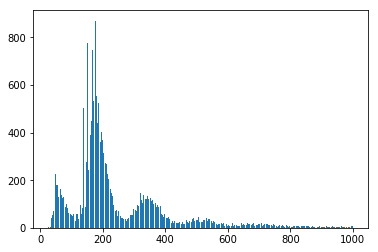

In [9]:
plt.bar(counts.keys(), counts.values())

In [14]:
#%load_ext watermark

#%watermark -v -m -p wget,pysam,collections,matplotlib

#print (" ")
#%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.3
IPython version      : 7.5.0

wget       : not installed
pysam      : 0.15.2
collections: unknown
matplotlib : 3.0.3

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1062.33.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

 
Last updated: Sun Feb 21 2021 15:00:32EST

